# Hyperparameter Tuning with GridSearchCV

## 1. Import Dependencies

In [123]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

warnings.filterwarnings('ignore')

## 2. Load Processed Data

In [124]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

print("Data loaded successfully from artifacts.")

Data loaded successfully from artifacts.


## 3. Hyperparameter Tuning for RandomForestClassifier

In [125]:
## if LR model

lr_param_grid = {
    'max_iter':[1000,5000,100000]
}

# 3 models trained in LR

#if DT model
dt_param_grid = {
    'max_depth':[8,16,12,20],
    'criterion':["gini","entropy","log_loss"]
}
# (4x4=16) models trained in LR

We will use **GridSearchCV** to find the optimal hyperparameters for the `RandomForestClassifier`.

In [126]:
rf_param_grid = {
    # (4x4x4x3x3=576) models trained in LR with all
    # nest x max x criter = 64 models
    'n_estimators': [100,50, 200, 300],
    'max_depth': [8, 12, 16, 20],
    'criterion':["gini","entropy","log_loss"],
   # 'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4]
}

param_grid = {
    'Logistic Regression': lr_param_grid,
    'Decision Tree': dt_param_grid,
    'Random Forest': rf_param_grid
}


models = {
    'Logistic Regression': LogisticRegression(),

    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

cv = StratifiedKFold(
    n_splits=6,  # Using 6 splits for a more robust evaluation
    random_state=42,
    shuffle=True
)

rf = RandomForestClassifier(random_state=42)
grid_search_results = {}

for model_name,model in models.items():

    print(f"Starting GridSearchCV for {model_name}...")
    current_param_grid = param_grid[model_name]

    grid_search = GridSearchCV(
            estimator=model, 
            param_grid=current_param_grid, 
            cv=cv, 
            n_jobs=-1, # Use all available cores
            scoring='f1',
            verbose=1,
            return_train_score=False
        )
    print(f"Fitting GridSearchCV for {model_name}...")
    grid_search.fit(X_train, Y_train)
    grid_search_results[model_name] = grid_search
    print(f"{model_name} GridSearchCV completed....")
    print(f"{grid_search.best_params_} Best Parameters....")
    print(f"{grid_search.best_score_} Besct CV Score....")
    print("")



Starting GridSearchCV for Logistic Regression...
Fitting GridSearchCV for Logistic Regression...
Fitting 6 folds for each of 3 candidates, totalling 18 fits
Logistic Regression GridSearchCV completed....
{'max_iter': 1000} Best Parameters....
0.7193121063357041 Besct CV Score....

Starting GridSearchCV for Decision Tree...
Fitting GridSearchCV for Decision Tree...
Fitting 6 folds for each of 12 candidates, totalling 72 fits
Decision Tree GridSearchCV completed....
{'criterion': 'entropy', 'max_depth': 20} Best Parameters....
0.8534707240999255 Besct CV Score....

Starting GridSearchCV for Random Forest...
Fitting GridSearchCV for Random Forest...
Fitting 6 folds for each of 48 candidates, totalling 288 fits
Random Forest GridSearchCV completed....
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 300} Best Parameters....
0.9081753576757089 Besct CV Score....



## 4. Best Model and Parameters

In [127]:
print(f"Best F1 Score from GridSearch: {grid_search.best_score_:.4f}")
print("Best Parameters found:")
print(grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

Best F1 Score from GridSearch: 0.9082
Best Parameters found:
{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 300}


## 5. Evaluate Best Model on Test Set

In [128]:
Y_hat_test = best_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_hat_test)
test_f1 = f1_score(Y_test, Y_hat_test)

print(f"--- Performance of Tuned RandomForest on Test Set ---")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1 Score: {test_f1:.4f}")

NameError: name 'best_model' is not defined

### Confusion Matrix

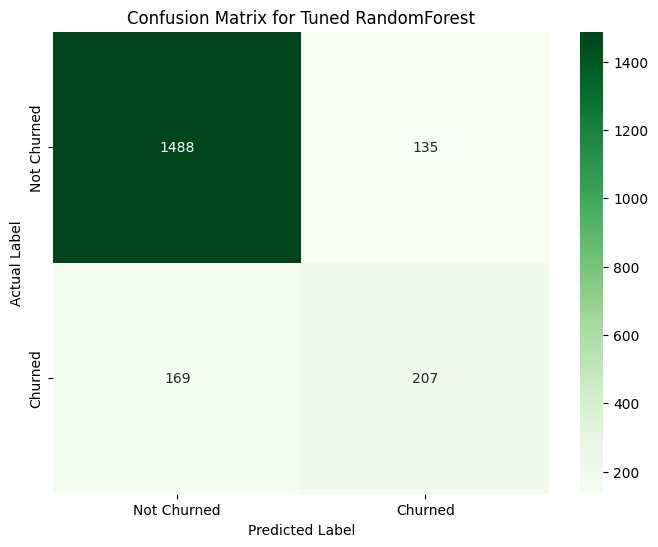

In [23]:
cm = confusion_matrix(Y_test, Y_hat_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Tuned RandomForest')
plt.show()

## 6. Save the Tuned Model

In [24]:
joblib.dump(best_rf_model, 'model/tuned_random_forest_model.pkl')
print("Tuned RandomForest model saved to 'model/tuned_random_forest_model.pkl'.")

Tuned RandomForest model saved to 'model/tuned_random_forest_model.pkl'.
